Agenda

Apply ensemble techniques and advanced metrics to a real-world dataset, such as the Heart Disease Dataset from UCI.

Tasks:
    Load the dataset and preprocess it.
    Train a Random Forest and a Gradient Boosting model.
    Evaluate the models using multiple metrics:
    Accuracy
    F1 Score
    ROC-AUC
    Precision-Recall Curve
    Compare the models' performance and write a brief report:
    Which model performed better and why?
    Which metric provided the most insights?


In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,roc_curve,recall_score,precision_score
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('./datasets/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
df.isnull().sum()
#no null value
# df.shape
# df.duplicated(subset=['']).sum()
df.describe()
#data cleaning

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
#Splitting data
X = df.drop(columns=['target'])
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [22]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

y_pred = rf_model.predict(x_test)

rf_model_accuracy = accuracy_score(y_pred,y_test)
rf_model_recall_score = recall_score(y_pred,y_test)
rf_model_precision_score = precision_score(y_pred,y_test)
rf_model_f1_score = f1_score(y_pred,y_test,average='weighted')
rf_model_rc_auc_score = roc_auc_score(y_pred,y_test)

print(f'Accuracy = {rf_model_accuracy}')
print(f'F1 Score = {rf_model_f1_score}')
print(f'ROC AUC Score = {rf_model_rc_auc_score}')
print(f'Recall Score = {rf_model_recall_score}')
print(f'Precision Score = {rf_model_precision_score}')


# scores = cross_val_score(rf_model,X,y,cv =10,scoring='accuracy')
# print("Cross-validated accuracy:", scores.mean())
#Cross-validated accuracy: 0.9970588235294118

Accuracy = 0.9853658536585366
F1 Score = 0.9853679432060973
ROC AUC Score = 0.9857142857142857
Recall Score = 1.0
Precision Score = 0.970873786407767


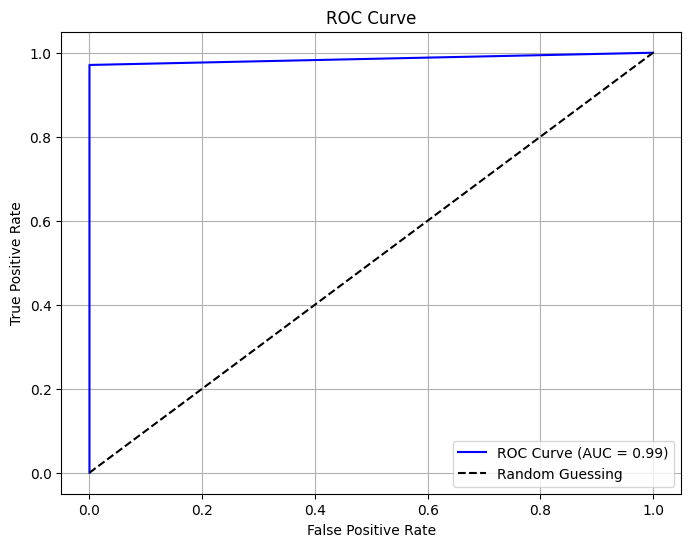

In [15]:
#plotting ROC AUC curve for RandomForest

roc_auc = roc_auc_score(y_test, y_pred)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [26]:
gB_model = GradientBoostingClassifier(n_estimators=100,random_state=42)
gB_model.fit(x_train,y_train)

y_pred = gB_model.predict(x_test)



gB_model_accuracy = accuracy_score(y_pred,y_test)
gB_model_f1_score = f1_score(y_pred,y_test,average='weighted')
gB_model_rc_auc_score = roc_auc_score(y_pred,y_test)
gB_model_recall_score = recall_score(y_pred,y_test)
gB_model_precision_score = precision_score(y_pred,y_test)

print(f'Accuracy = {gB_model_accuracy}')
print(f'F1 Score = {gB_model_f1_score}')
print(f'ROC AUC Score = {gB_model_rc_auc_score}')
print(f'Recall Score = {gB_model_recall_score}')
print(f'Precision Score = {gB_model_precision_score}')



Accuracy = 0.9317073170731708
F1 Score = 0.931739837398374
ROC AUC Score = 0.9324337211520122
Recall Score = 0.9158878504672897
Precision Score = 0.9514563106796117


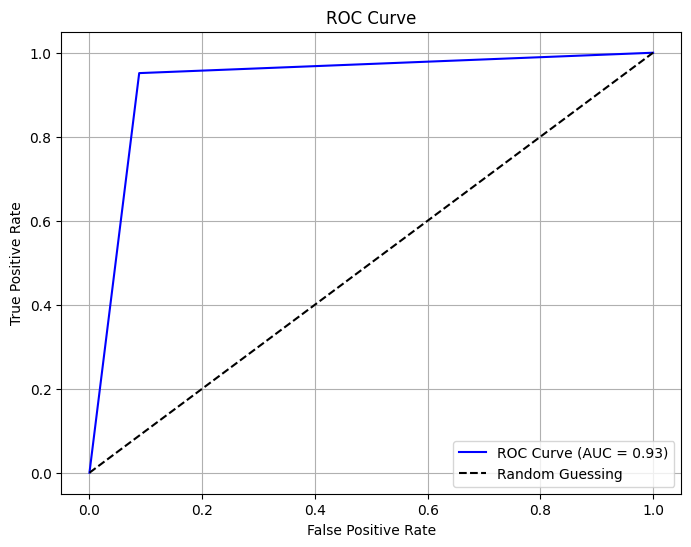

In [17]:
#plotting ROC AUC curve for Gradient Boosting

roc_auc = roc_auc_score(y_test, y_pred)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [27]:
print(f"""
Performnce Report
- Random Forest
    - Accuracy : {rf_model_accuracy:.3f}
    - F1 Score : {rf_model_f1_score:.3f}
    - ROC AUC Score : {rf_model_rc_auc_score:.3f}
    - Recall Score : {rf_model_recall_score}
    - Precision Score : {rf_model_precision_score}
-Gradient Boosting
    - Accuracy : {gB_model_accuracy:.3f}
    - F1 Score : {gB_model_f1_score:.3f}
    - ROC AUC Score : {gB_model_rc_auc_score:.3f}
    - Recall Score : {gB_model_recall_score}
    - Precision Score : {gB_model_precision_score}

Random Forest perormed better accross all metrices 

""")


Performnce Report
- Random Forest
    - Accuracy : 0.985
    - F1 Score : 0.985
    - ROC AUC Score : 0.986
    - Recall Score : 1.0
    - Precision Score : 0.970873786407767
-Gradient Boosting
    - Accuracy : 0.932
    - F1 Score : 0.932
    - ROC AUC Score : 0.932
    - Recall Score : 0.9158878504672897
    - Precision Score : 0.9514563106796117

Random Forest perormed better accross all metrices 


